In [1]:
# Import packages
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np

In [2]:
# Import data portland_final.csv
df = pd.read_csv("Final_merged_city_portland_with_NAICS.csv")

In [14]:
df.tail(40)

,Unnamed: 0,Unnamed: 0.1,geo_id,centroid,year,geometry,total_tran,pop,edut,collegemale,...,public_ratio,car_ratio,bicy_ratio,walked_ratio,maxNaics_est,totalEstab,maxNaics_emp,total_college,college_ratio,college_ratio_pop
4960,4960,1843,41051008301,POINT (-122.572278522572 45.49731196371264),2015,MULTIPOLYGON (((-122.5787005495399 45.49740603...,1573.0,4317.0,2908.0,247.0,...,0.177368,0.761602,0.009536,0.016529,72,130,72,437.0,0.150275,0.101228
4961,4961,1853,41051008302,POINT (-122.5569205042123 45.4970657113964),2015,MULTIPOLYGON (((-122.5657575052936 45.49323006...,1726.0,4357.0,2872.0,214.0,...,0.152375,0.741020,0.026072,0.024913,72,130,72,374.0,0.130223,0.085839
4962,4962,1867,41051008400,POINT (-122.5428252449001 45.49691909524015),2015,MULTIPOLYGON (((-122.548007526976 45.504192155...,1909.0,4520.0,3112.0,105.0,...,0.109481,0.770561,0.003143,0.047145,72,130,72,232.0,0.074550,0.051327
4963,4963,1883,41051008500,POINT (-122.547126858435 45.48282091614918),2015,MULTIPOLYGON (((-122.5574044200961 45.47833505...,1827.0,4263.0,2809.0,83.0,...,0.112206,0.815545,0.015873,0.016968,72,130,72,240.0,0.085440,0.056298
4964,4964,1899,41051008600,POINT (-122.5841999670118 45.46869038110157),2015,MULTIPOLYGON (((-122.589348427813 45.468646920...,1821.0,4195.0,2726.0,60.0,...,0.118067,0.813839,0.009885,0.017573,72,130,72,292.0,0.107117,0.069607
4965,4965,1945,41051008901,POINT (-122.5169349854279 45.47030957905045),2015,MULTIPOLYGON (((-122.5493773955564 45.47604007...,4431.0,9414.0,6537.0,473.0,...,0.039720,0.895735,0.003611,0.004514,72,130,72,1045.0,0.159859,0.111005
4966,4966,1957,41051008902,POINT (-122.5605573563522 45.46743694947033),2015,MULTIPOLYGON (((-122.5790413899689 45.46437394...,1922.0,3833.0,2630.0,238.0,...,0.079084,0.810094,0.028096,0.049948,72,130,72,475.0,0.180608,0.123924
4967,4967,1971,41051009000,POINT (-122.5306977041103 45.49261599741428),2015,MULTIPOLYGON (((-122.5377964271651 45.48742414...,4525.0,10489.0,6588.0,468.0,...,0.120442,0.784530,0.000000,0.013481,72,130,72,808.0,0.122647,0.077033
4968,4968,101,41051000502,POINT (-122.5849422459003 45.48369532857067),2016,MULTIPOLYGON (((-122.5963935475611 45.49031295...,2744.0,4924.0,3793.0,377.0,...,0.119169,0.759111,0.037901,0.022595,72,128,72,724.0,0.190878,0.147035
4969,4969,110,41051000601,POINT (-122.5666456072424 45.48478013912332),2016,MULTIPOLYGON (((-122.5787875151165 45.49027201...,2706.0,5477.0,3620.0,242.0,...,0.112343,0.805617,0.031412,0.030303,72,128,72,527.0,0.145580,0.096221


In [19]:
df = df.drop(columns = ["Unnamed: 0"])

In [20]:
df = df.drop_duplicates()

In [21]:
df.shape

(2714, 29)

In [22]:
df.head(20)

,Unnamed: 0.1,geo_id,centroid,year,geometry,total_tran,pop,edut,collegemale,collegefemale,...,public_ratio,car_ratio,bicy_ratio,walked_ratio,maxNaics_est,totalEstab,maxNaics_emp,total_college,college_ratio,college_ratio_pop
0,2432,41051010402,POINT (-122.3356996936241 45.48566422279789),2010,MULTIPOLYGON (((-122.3868792758254 45.51902980...,2601.0,5717.0,3699.0,294.0,356.0,...,0.019608,0.891580,0.005767,0.014994,23,95,23,650.0,0.175723,0.113696
1,2435,41051010402,POINT (-122.3356996936241 45.48566422279789),2011,MULTIPOLYGON (((-122.3868792758254 45.51902980...,2826.0,6037.0,4024.0,368.0,476.0,...,0.047417,0.866596,0.030432,0.009908,23,92,23,844.0,0.209742,0.139805
2,2438,41051010402,POINT (-122.3356996936241 45.48566422279789),2012,MULTIPOLYGON (((-122.3868792758254 45.51902980...,2868.0,6153.0,4090.0,369.0,507.0,...,0.041841,0.857043,0.033473,0.004533,23,85,23,876.0,0.214181,0.142370
3,2441,41051010402,POINT (-122.3356996936241 45.48566422279789),2013,MULTIPOLYGON (((-122.3868792758254 45.51902980...,2876.0,6022.0,3931.0,296.0,404.0,...,0.039986,0.858832,0.025730,0.012517,23,86,23,700.0,0.178072,0.116240
4,2444,41051010402,POINT (-122.335683996136 45.48565935229686),2014,MULTIPOLYGON (((-122.3868792758254 45.51902980...,3078.0,6181.0,4094.0,316.0,457.0,...,0.028265,0.875569,0.016244,0.023392,23,89,23,773.0,0.188813,0.125061
5,2447,41051010402,POINT (-122.3356858461854 45.48565778402043),2015,MULTIPOLYGON (((-122.3868792758254 45.51902980...,3063.0,6349.0,4184.0,346.0,517.0,...,0.049298,0.841659,0.016650,0.026118,23,87,23,863.0,0.206262,0.135927
6,2450,41051010402,POINT (-122.3356596646475 45.48564052912985),2016,MULTIPOLYGON (((-122.3868792758254 45.51902980...,3190.0,6566.0,4383.0,334.0,540.0,...,0.028527,0.878056,0.000000,0.033856,23,87,23,874.0,0.199407,0.133110
7,2453,41051010402,POINT (-122.3356596646475 45.48564052912985),2017,MULTIPOLYGON (((-122.3868792758254 45.51902980...,3456.0,6981.0,4633.0,399.0,485.0,...,0.037037,0.882523,0.000000,0.035880,23,97,23,884.0,0.190805,0.126629
8,2536,41051010500,POINT (-122.08527042624 45.52768157713402),2010,MULTIPOLYGON (((-122.3970989671113 45.57260058...,1765.0,3944.0,2580.0,258.0,313.0,...,0.012465,0.803966,0.002266,0.031161,44,6,72,571.0,0.221318,0.144777
200,2539,41051010500,POINT (-122.08527042624 45.52768157713402),2011,MULTIPOLYGON (((-122.3970989671113 45.57260058...,1796.0,4138.0,2803.0,247.0,284.0,...,0.004454,0.827951,0.005011,0.027283,44,6,72,531.0,0.189440,0.128323


In [23]:
# Check all column names
df.columns

Index(['Unnamed: 0.1', 'geo_id', 'centroid', 'year', 'geometry', 'total_tran',
       'pop', 'edut', 'collegemale', 'collegefemale', 'households', 'income',
       'zipcode', 'Empratio', 'estabratio', 'ratio_65', 'ratio_22_50',
       'bus_ratio', 'bus_ratio_total', 'public_ratio', 'car_ratio',
       'bicy_ratio', 'walked_ratio', 'maxNaics_est', 'totalEstab',
       'maxNaics_emp', 'total_college', 'college_ratio', 'college_ratio_pop'],
      dtype='object')

# modeling

dependent variables(outputs):
1. Empratio : the size of employment  of all industries in corresponding us census tract and  year

2. estabratio: the size of establishment of all industries in corresponding us census tract and  year


use all the varaibles to predict establishment size 
1. pop: the total population of the corresponding census tract(not prediction)
2. households: households of the corresponding census tract
3. income: income of the corresponding census tract
4. edut: total education population of the corresponding census tract
5. total_college: college population of the corresponding census tract
6. college_ratio: total college ratio
7. ratio_65: the ratio of the population who are older than 65
8. ration_22_50: the ratio of the population who are from 22 to 50
9. diffEmpratio: the difference of employee size from last year at same census tract
10. diffestabratio: the difference of establishment size from last year at the same census tract
11. college_ratio_pop: the ratio of college attendance by the total population
12. bus_ratio: the ratio of bus usage by total public transportation
13. bus_ratio_total: the ratio of bus usage by total transportation(including private and public transportation)
14. public_ratio: the ratio of public transportation by total transportation
15. car_ratio: the ratio of car usage by total transportation
16. bicy_ratio: the ratio of bicycle usage by total transportation
17. walked_ratio: ration of people who walked to work by total transportation usage
18. gini: Gini index of the corresponding census tract

In [5]:
# Calculate the total population with college degrees
df["total_college"] = df["collegemale"] + df["collegefemale"]

# Calculate the ratio of people with college degree vs education population
df["college_ratio"] = df["total_college"] / df["edut"]

# Calculate the ratio of people with college degree vs total population
df["college_ratio_pop"] = df["total_college"] / df["pop"]

In [8]:
data = df[["zipcode", "geo_id", "year", "pop", "households", "income", "edut", "total_college", "college_ratio",
          "ratio_65", "ratio_22_50", "college_ratio_pop", "bus_ratio", 
           "bus_ratio_total", "public_ratio", "car_ratio", "bicy_ratio", "walked_ratio", "maxNaics_est",
           "maxNaics_emp", "Empratio", "estabratio"]]

In [10]:
data.head(40)

,zipcode,geo_id,year,pop,households,income,edut,total_college,college_ratio,ratio_65,...,bus_ratio,bus_ratio_total,public_ratio,car_ratio,bicy_ratio,walked_ratio,maxNaics_est,maxNaics_emp,Empratio,estabratio
0,97009,41051010402,2010,5717.0,162.0,1859.0,3699.0,650.0,0.175723,0.391464,...,0.490196,0.009612,0.019608,0.891580,0.005767,0.014994,23,23,0.000000,0.000000
1,97009,41051010402,2011,6037.0,149.0,1960.0,4024.0,844.0,0.209742,0.405831,...,0.305970,0.014508,0.047417,0.866596,0.030432,0.009908,23,23,0.000000,0.000000
2,97009,41051010402,2012,6153.0,139.0,1998.0,4090.0,876.0,0.214181,0.393954,...,0.266667,0.011158,0.041841,0.857043,0.033473,0.004533,23,23,0.000000,0.000000
3,97009,41051010402,2013,6022.0,129.0,2087.0,3931.0,700.0,0.178072,0.366490,...,0.321739,0.012865,0.039986,0.858832,0.025730,0.012517,23,23,0.000000,0.000000
4,97009,41051010402,2014,6181.0,120.0,2191.0,4094.0,773.0,0.188813,0.387316,...,0.264368,0.007472,0.028265,0.875569,0.016244,0.023392,23,23,0.000000,0.000000
5,97009,41051010402,2015,6349.0,116.0,2201.0,4184.0,863.0,0.206262,0.382107,...,0.596026,0.029383,0.049298,0.841659,0.016650,0.026118,23,23,0.000000,0.000000
6,97009,41051010402,2016,6566.0,117.0,2201.0,4383.0,874.0,0.199407,0.362473,...,0.813187,0.023197,0.028527,0.878056,0.000000,0.033856,23,23,0.000000,0.000000
7,97009,41051010402,2017,6981.0,115.0,2303.0,4633.0,884.0,0.190805,0.355966,...,0.867188,0.032118,0.037037,0.882523,0.000000,0.035880,23,23,0.000000,0.000000
8,97014,41051010500,2010,3944.0,106.0,1320.0,2580.0,571.0,0.221318,0.259381,...,1.000000,0.012465,0.012465,0.803966,0.002266,0.031161,44,72,255.555556,17.888889
9,97014,41051010500,2010,3944.0,106.0,1320.0,2580.0,571.0,0.221318,0.259381,...,1.000000,0.012465,0.012465,0.803966,0.002266,0.031161,44,72,255.555556,17.888889


In [24]:
data.describe()

,zipcode,geo_id,year,pop,households,income,edut,total_college,college_ratio,ratio_65,...,bus_ratio,bus_ratio_total,public_ratio,car_ratio,bicy_ratio,walked_ratio,maxNaics_est,maxNaics_emp,Empratio,estabratio
count,5000.000000,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,4990.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,97141.448000,4.105101e+10,2013.500000,4335.176800,131.196800,1702.246600,3052.974000,720.626600,0.236947,0.403448,...,0.692153,0.060789,0.080433,0.733387,0.039866,0.046567,54.931000,56.787800,907.264993,46.755666
std,97.113043,5.508608e+04,2.291517,1530.487209,32.852956,627.505749,1023.597082,396.411115,0.094372,0.124421,...,0.339630,0.055611,0.062679,0.134604,0.049350,0.064930,14.099404,14.925298,2178.326883,95.359890
min,97009.000000,4.105100e+10,2010.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.000000,23.000000,0.000000,0.000000
25%,97014.000000,4.105100e+10,2011.750000,3472.000000,112.000000,1404.000000,2538.000000,491.000000,0.166110,0.299598,...,0.404177,0.006198,0.030815,0.682835,0.006113,0.017659,42.000000,42.000000,121.388889,9.583333
50%,97203.000000,4.105101e+10,2013.500000,4186.000000,122.000000,1515.000000,2867.000000,571.000000,0.206262,0.395276,...,0.848485,0.050717,0.067407,0.777994,0.014533,0.031161,54.000000,62.000000,249.166667,17.250000
75%,97218.000000,4.105101e+10,2015.250000,4757.250000,151.000000,1955.000000,3422.000000,896.250000,0.317741,0.493375,...,1.000000,0.103899,0.123926,0.827746,0.062032,0.039476,72.000000,72.000000,824.284153,43.716044
max,97266.000000,4.105198e+10,2017.000000,11030.000000,271.000000,5342.000000,7211.000000,2568.000000,0.507680,0.770654,...,1.000000,0.270349,0.379845,0.987326,0.268380,1.000000,81.000000,81.000000,35131.107407,1355.154074


In [25]:
# Label our Empratio and estabratio
# Transfer continous data to 4 groups of categorical data by quartile
# emp_label: 0 < 59.451386 < 363.368506 < 1224.943938 < infinity
# est_label: 0 < 3.579339 < 20.674918 < 69.929409 < infinity

data["emp_label"] = pd.qcut(data["Empratio"], 4, labels = ["Low", "Medium Low", "Medium High", "High"])
data["est_label"] = pd.qcut(data["estabratio"], 4, labels = ["Low", "Medium Low", "Medium High", "High"])

/Users/zehui/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/zehui/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [26]:
data.head(20)

,zipcode,geo_id,year,pop,households,income,edut,total_college,college_ratio,ratio_65,...,public_ratio,car_ratio,bicy_ratio,walked_ratio,maxNaics_est,maxNaics_emp,Empratio,estabratio,emp_label,est_label
0,97009,41051010402,2010,5717.0,162.0,1859.0,3699.0,650.0,0.175723,0.391464,...,0.019608,0.891580,0.005767,0.014994,23,23,0.000000,0.000000,Low,Low
1,97009,41051010402,2011,6037.0,149.0,1960.0,4024.0,844.0,0.209742,0.405831,...,0.047417,0.866596,0.030432,0.009908,23,23,0.000000,0.000000,Low,Low
2,97009,41051010402,2012,6153.0,139.0,1998.0,4090.0,876.0,0.214181,0.393954,...,0.041841,0.857043,0.033473,0.004533,23,23,0.000000,0.000000,Low,Low
3,97009,41051010402,2013,6022.0,129.0,2087.0,3931.0,700.0,0.178072,0.366490,...,0.039986,0.858832,0.025730,0.012517,23,23,0.000000,0.000000,Low,Low
4,97009,41051010402,2014,6181.0,120.0,2191.0,4094.0,773.0,0.188813,0.387316,...,0.028265,0.875569,0.016244,0.023392,23,23,0.000000,0.000000,Low,Low
5,97009,41051010402,2015,6349.0,116.0,2201.0,4184.0,863.0,0.206262,0.382107,...,0.049298,0.841659,0.016650,0.026118,23,23,0.000000,0.000000,Low,Low
6,97009,41051010402,2016,6566.0,117.0,2201.0,4383.0,874.0,0.199407,0.362473,...,0.028527,0.878056,0.000000,0.033856,23,23,0.000000,0.000000,Low,Low
7,97009,41051010402,2017,6981.0,115.0,2303.0,4633.0,884.0,0.190805,0.355966,...,0.037037,0.882523,0.000000,0.035880,23,23,0.000000,0.000000,Low,Low
8,97014,41051010500,2010,3944.0,106.0,1320.0,2580.0,571.0,0.221318,0.259381,...,0.012465,0.803966,0.002266,0.031161,44,72,255.555556,17.888889,Medium High,Medium High
9,97014,41051010500,2010,3944.0,106.0,1320.0,2580.0,571.0,0.221318,0.259381,...,0.012465,0.803966,0.002266,0.031161,44,72,255.555556,17.888889,Medium High,Medium High


# Decision Tree

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

## Employment label

In [29]:
data = data.dropna()
# First, create our X and y
X = data.loc[ : , "pop":"maxNaics_emp"]
y_emp = data.loc[ : , "emp_label"]

# Then, split into 70% train set and 30% test set
X_train, X_test, y_train_emp, y_test_emp=train_test_split(X, y_emp, test_size=0.3,random_state=2020)

In [38]:
#Using the GridSearchCV to find optimal estimators and leaf nodes
param_grid = {'max_depth':range(1,51), 'max_leaf_nodes':range(2,51)}
dt = DecisionTreeClassifier()
gr = GridSearchCV(dt, param_grid=param_grid, scoring='accuracy')
rs = gr.fit(X_train, y_train_emp)
print(rs.best_params_)
print(rs.score(X_test, y_test_emp))

{'max_depth': 20, 'max_leaf_nodes': 47}
0.6746826987307949


In [39]:
from sklearn import tree

# Use max_depth = 10 and max_leaf_nodes = 29 in this case
dt = DecisionTreeClassifier(max_depth = 20, max_leaf_nodes = 47)
dt.fit(X_train, y_train_emp)

thestring = tree.export_graphviz(dt,out_file = None,
                         feature_names = X_train.columns.values,  
                         class_names = dt.classes_,  
                         filled = True, rounded = True,  
                         special_characters = True, impurity = False).replace("<br/>",", ").replace("&le;","<=").replace("=<","=\"").replace(">,","\",")

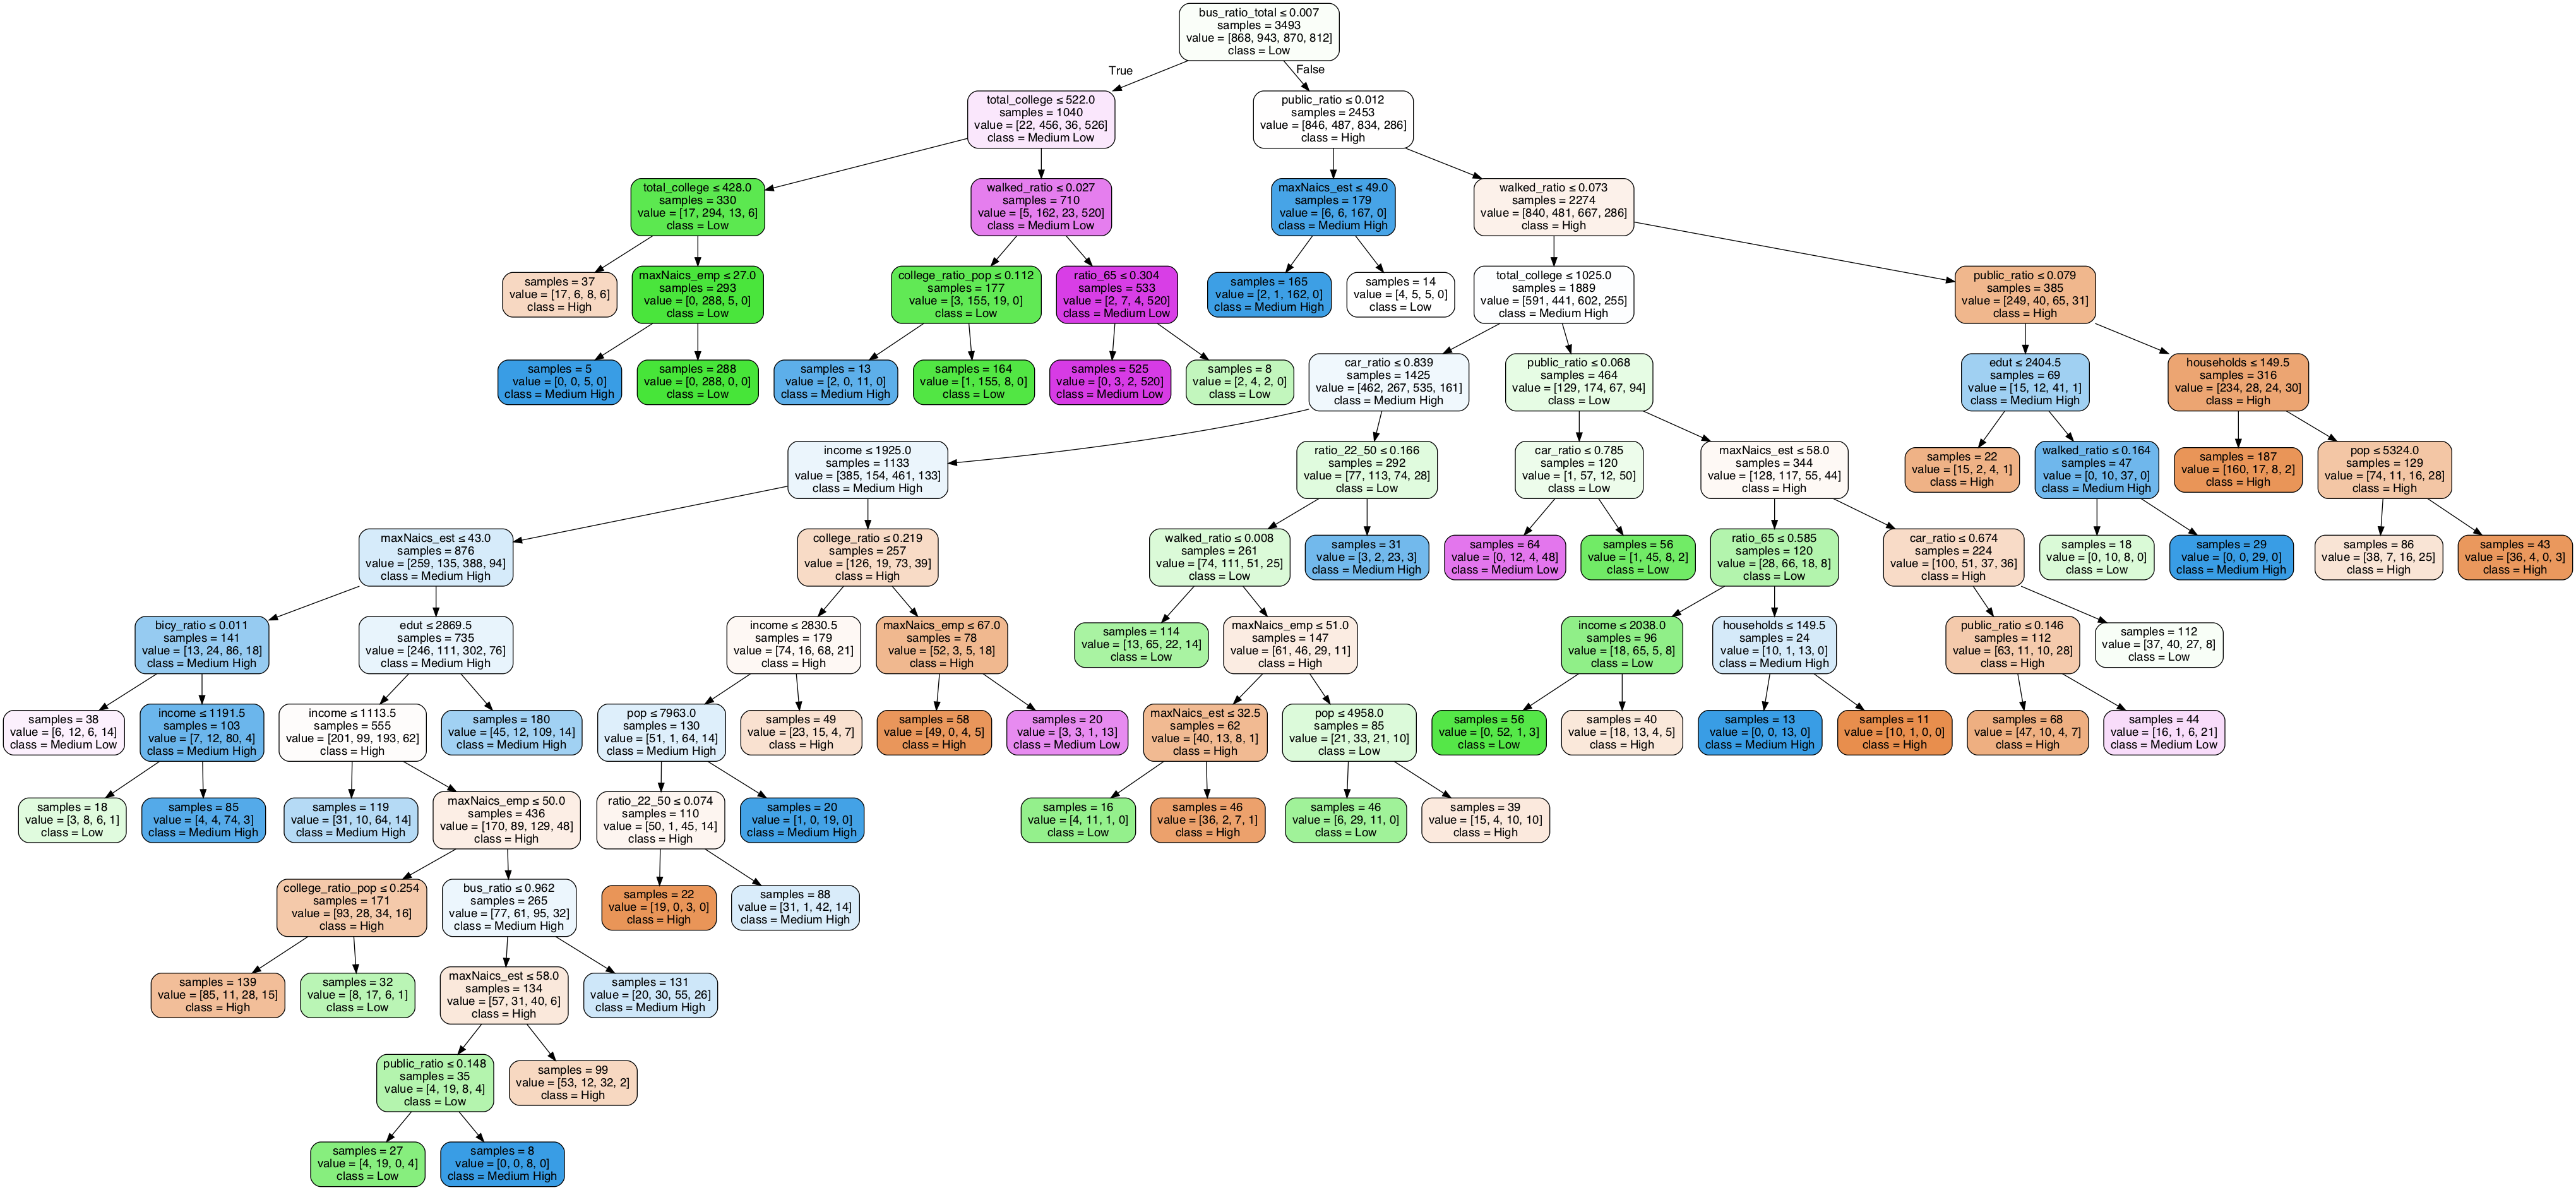

In [40]:
from IPython.display import Image  
import pydotplus
thestring = tree.export_graphviz(dt, out_file = None,  
                         feature_names = X_train.columns.values, 
                         class_names = dt.classes_,  
                         filled = True, rounded = True,  
                         special_characters = True, impurity = False)
graph = pydotplus.graph_from_dot_data(thestring)  
Image(graph.create_png())  

In [41]:
Feature_importance=pd.DataFrame([list(X_train.columns),list(dt.feature_importances_)]).T
Feature_importance.columns=["variables","importance"]

# list the top 5 most important features in order
Feature_importance.sort_values(by="importance",ascending=False).iloc[:5,:]

,variables,importance
10,bus_ratio_total,0.211241
14,walked_ratio,0.208109
4,total_college,0.19903
11,public_ratio,0.116374
12,car_ratio,0.0413355


## Establishment label

In [42]:
data = data.dropna()
# First, create our X and y
X = data.loc[ : , "pop":"maxNaics_emp"]
y_est = data.loc[ : , "est_label"]

# Then, split into 70% train set and 30% test set
X_train, X_test, y_train_est, y_test_est = train_test_split(X, y_est, test_size=0.3,random_state=2020)

In [43]:
#Using the GridSearchCV to find optimal estimators and leaf nodes
param_grid = {'max_depth':range(1,51), 'max_leaf_nodes':range(2,51)}
dt = DecisionTreeClassifier()
gr = GridSearchCV(dt, param_grid=param_grid, scoring='accuracy')
rs = gr.fit(X_train, y_train_est)
print(rs.best_params_)
print(rs.score(X_test, y_test_est))

{'max_depth': 9, 'max_leaf_nodes': 49}
0.7020708082832331


In [44]:
# Use max_depth = 9 and max_leaf_nodes = 49 in this case
dt = DecisionTreeClassifier(max_depth = 9, max_leaf_nodes = 49)
dt.fit(X_train, y_train_emp)

thestring = tree.export_graphviz(dt,out_file = None,
                         feature_names = X_train.columns.values,  
                         class_names = dt.classes_,  
                         filled = True, rounded = True,  
                         special_characters = True, impurity = False).replace("<br/>",", ").replace("&le;","<=").replace("=<","=\"").replace(">,","\",")

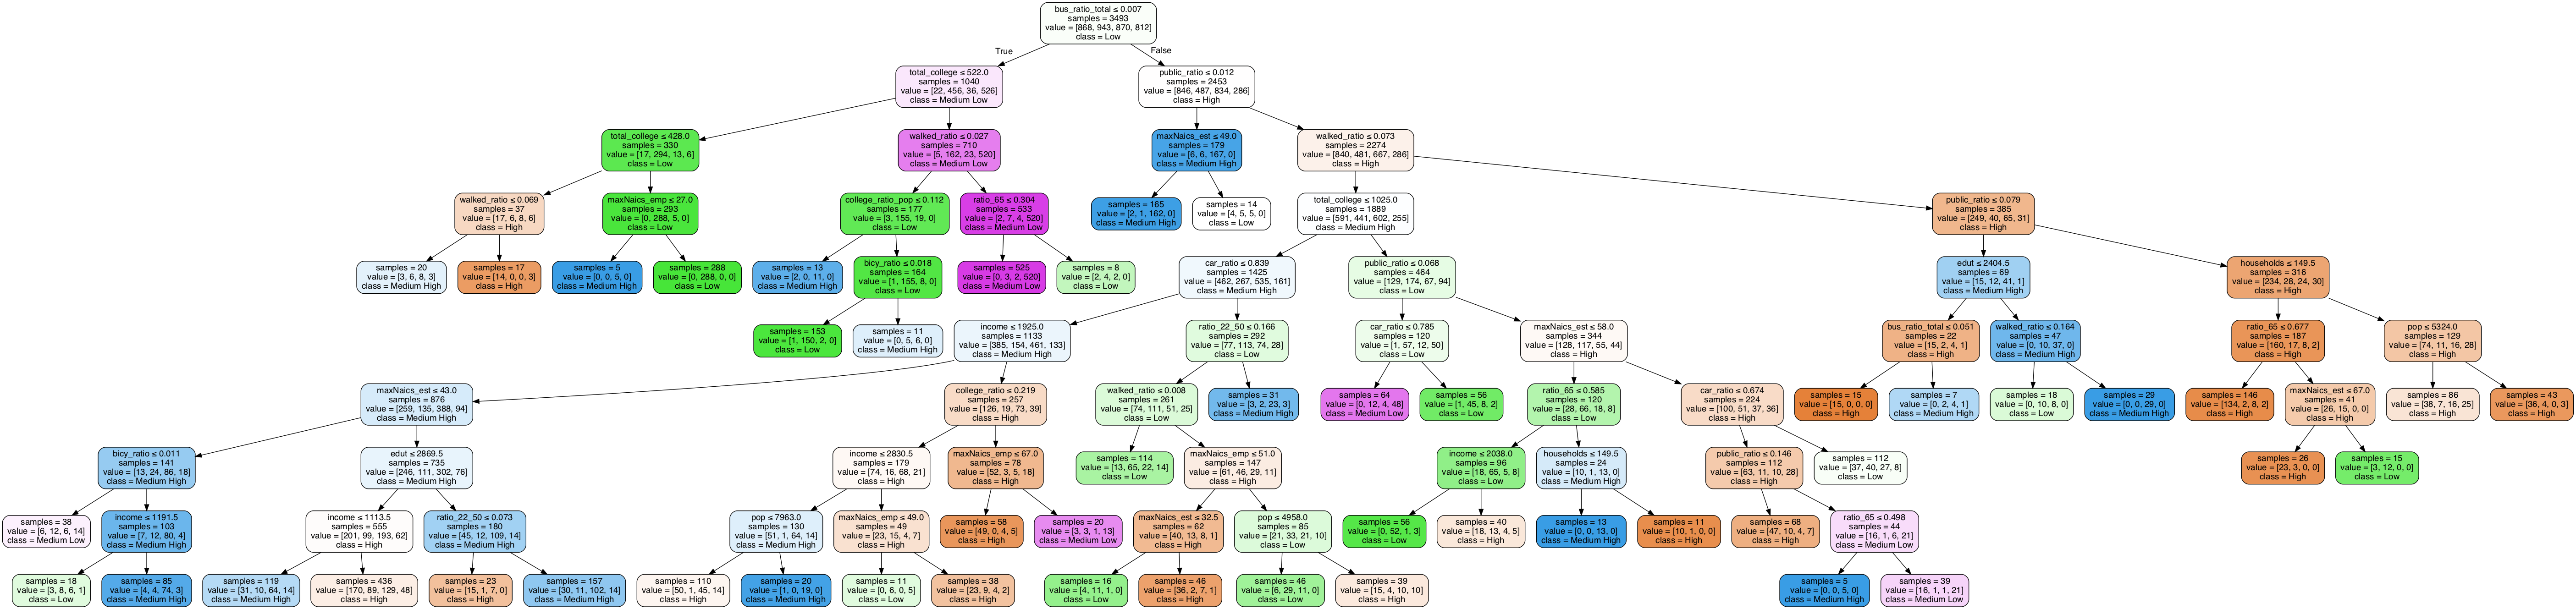

In [45]:
thestring = tree.export_graphviz(dt, out_file = None,  
                         feature_names = X_train.columns.values, 
                         class_names = dt.classes_,  
                         filled = True, rounded = True,  
                         special_characters = True, impurity = False)
graph = pydotplus.graph_from_dot_data(thestring)  
Image(graph.create_png())  

In [46]:
Feature_importance=pd.DataFrame([list(X_train.columns),list(dt.feature_importances_)]).T
Feature_importance.columns=["variables","importance"]

# list the top 5 most important features in order
Feature_importance.sort_values(by="importance",ascending=False).iloc[:5,:]

,variables,importance
10,bus_ratio_total,0.215985
14,walked_ratio,0.212609
4,total_college,0.198937
11,public_ratio,0.109574
12,car_ratio,0.0413164


# Random Forest

## Employment label

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Random forest model
rf = RandomForestClassifier(n_estimators=100, n_jobs=-1,max_leaf_nodes=47)
rf.fit(X_train, y_train_emp)
print (rf.score(X_test, y_test_emp))

0.7120908483633934


In [48]:
Feature_importance=pd.DataFrame([list(X_train.columns),list(rf.feature_importances_)]).T
Feature_importance.columns=["variables","importance"]

# list the top 5 most important features in order
Feature_importance.sort_values(by="importance",ascending=False).iloc[:5,:]

,variables,importance
10,bus_ratio_total,0.137778
6,ratio_65,0.101229
11,public_ratio,0.0944386
8,college_ratio_pop,0.0705182
14,walked_ratio,0.0697476


## Establishment label

In [49]:
rf = RandomForestClassifier(n_estimators=100, n_jobs=-1,max_leaf_nodes=49)
rf.fit(X_train, y_train_est)
print (rf.score(X_test, y_test_est))

0.7207748830995324


In [50]:
Feature_importance=pd.DataFrame([list(X_train.columns),list(rf.feature_importances_)]).T
Feature_importance.columns=["variables","importance"]

# list the top 5 most important features in order
Feature_importance.sort_values(by="importance",ascending=False).iloc[:5,:]

,variables,importance
10,bus_ratio_total,0.192937
6,ratio_65,0.10854
11,public_ratio,0.0975252
9,bus_ratio,0.0619703
14,walked_ratio,0.0606242


# SVM

In [51]:
from sklearn import svm
import matplotlib.pyplot as plt

## Employment size

In [52]:
data = data.dropna()
# First, create our X and y
X = data.loc[ : , "pop":"maxNaics_emp"]
y_emp = data.loc[ : , "emp_label"]

# Then, split into 70% train set and 30% test set
X_train, X_test, y_train_emp, y_test_emp=train_test_split(X, y_emp, test_size=0.3,random_state=2020)

No handles with labels found to put in legend.


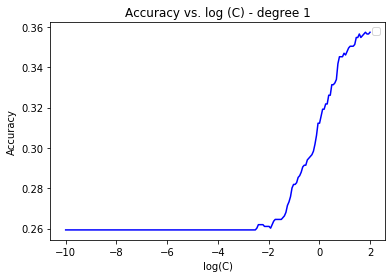

No handles with labels found to put in legend.


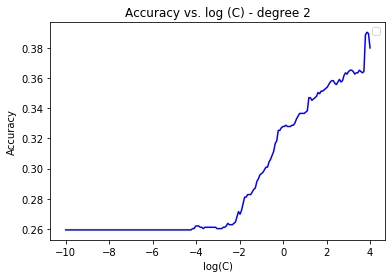

No handles with labels found to put in legend.


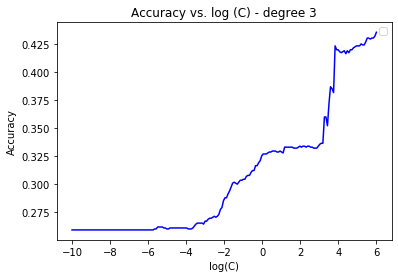

KeyboardInterrupt: 

In [53]:
# Next we generate validation data (X_vali, Y_vali) from the training dataset. 
# Denote the remaining training data by (X_train_1, Y_train_1).
X_train_1,X_vali,Y_train_1,Y_vali = train_test_split(X_train, y_train_emp, test_size=0.33, random_state=2020)

# Compute and plot the accuracy vs log(C)
for i in range(1,5):
    C = [np.exp(i) for i in np.linspace(-10,2*i,200)] 
    OS_validation=[]
    for c in C:
        clf = svm.SVC(kernel='poly',degree=i, C=c) 
        clf.fit(X_train_1, Y_train_1)
        correct=1.0*(clf.predict(X_vali)==np.asarray(Y_vali)).sum()/len(Y_vali) # OS score for validation set
        OS_validation.append(correct)
    

    C=[np.log(y) for y in C] # for a better graph
    plt.gca()
    plt.plot(C,OS_validation,'b',)
    plt.legend(loc='upper right')
    plt.title("Accuracy vs. log (C) - degree {}".format(i))
    plt.ylabel('Accuracy')
    plt.xlabel('log(C)')
    plt.show()

In [54]:
# Let's use polynomial SVM with degree 3

clf_2 = svm.SVC(kernel = "poly", degree = 3) 
clf_2.fit(X_train, y_train_emp)
print ("In sample, we successfully predict {} percent of the data".format((y_train_emp == clf_2.predict(X_train)).sum()*100/len(y_train_emp)))
print ("Out of sample, we successfully predict {} percent of the data".format((y_test_emp == clf_2.predict(X_test)).sum()*100/len(y_test_emp)))

In sample, we successfully predict 32.66533066132264 percent of the data
Out of sample, we successfully predict 31.79692718770875 percent of the data


In [55]:
clf_l = svm.SVC(kernel = "linear", C = 20) 
clf_l.fit(X_train, y_train_emp)
print ("In sample, we successfully predict {} percent of the data".format((y_train_emp == clf_l.predict(X_train)).sum()*100/len(y_train_emp)))
print ("Out of sample, we successfully predict {} percent of the data".format((y_test_emp == clf_l.predict(X_test)).sum()*100/len(y_test_emp)))

KeyboardInterrupt: 